**Introduction to Loading and Cleaning Data with Pandas**

Welcome to your first hands-on tutorial! Today, you'll learn how to load a dataset, explore its structure, clean messy data (if appropriate), and create basic visualizations using mainly Pandas, and Matplotlib for visualization.

**Step 1: Setup and Loading the Dataset**

Open Google Colab.
Create a new notebook.
Upload the dataset riyadh_places_8836x9.csv by clicking on the folder icon in the sidebar and using the "Upload" button.

In [16]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
path = "Resources/riyadh_places_8836x9.csv"
places_DS = pd.read_csv(path)

# Display the first few rows of the dataset
places_DS.head()

,id,place_name,is_restaurant,categories,average_rating,rate_count,granular_category,latitude,longitude
0,1,Shawarma Alaz,RESTAURANT,Sandwich|Fast Food|Shawarma,3.0,3,restaurants,24.645118,46.717640
1,2,Eben Ezar,RESTAURANT,Asian|Japanese,3.2,5,restaurants,24.646631,46.717658
2,3,Chowking,RESTAURANT,Noodles,4.5,305,restaurants,24.646194,46.717444
3,4,100 islands delights,RESTAURANT,Asian|Seafood,4.4,239,restaurants,24.646334,46.717329
4,5,CUSINA Cafe,RESTAURANT,Coffee,4.7,19,restaurants,24.645628,46.717110


**Step 2: Exploring the Dataset**

Use the following commands to get an overview of the dataset's structure.

In [5]:
# Check the structure of the dataset
places_DS.info()

# Display basic statistics
places_DS.describe()

# Check for missing values
places_DS.isnull().sum()

# Display the first 10 rows of the dataset
places_DS.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8836 entries, 0 to 8835
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8836 non-null   int64  
 1   place_name         8836 non-null   object 
 2   is_restaurant      8836 non-null   object 
 3   categories         8822 non-null   object 
 4   average_rating     8836 non-null   float64
 5   rate_count         8836 non-null   int64  
 6   granular_category  8836 non-null   object 
 7   latitude           8836 non-null   float64
 8   longitude          8836 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 621.4+ KB


,id,place_name,is_restaurant,categories,average_rating,rate_count,granular_category,latitude,longitude
0,1,Shawarma Alaz,RESTAURANT,Sandwich|Fast Food|Shawarma,3.0,3,restaurants,24.645118,46.717640
1,2,Eben Ezar,RESTAURANT,Asian|Japanese,3.2,5,restaurants,24.646631,46.717658
2,3,Chowking,RESTAURANT,Noodles,4.5,305,restaurants,24.646194,46.717444
3,4,100 islands delights,RESTAURANT,Asian|Seafood,4.4,239,restaurants,24.646334,46.717329
4,5,CUSINA Cafe,RESTAURANT,Coffee,4.7,19,restaurants,24.645628,46.717110
5,6,Jollibee,RESTAURANT,Fast Food|American,4.7,167,restaurants,24.646467,46.717225
6,7,Lapaz Batchoy,RESTAURANT,Grill|Asian|Seafood|Noodles,4.3,70,restaurants,24.646476,46.717190
7,8,Sushi Cutie,RESTAURANT,Asian,5.0,1,restaurants,24.646412,46.716680
8,9,Uncle Majid,RESTAURANT,Grill|Asian|Seafood|Noodles,4.5,19,restaurants,24.646931,46.716805
9,10,CUSINA,RESTAURANT,Grill|Seafood,3.9,7,restaurants,24.646311,46.716620


**Discussion questions**

1. What data types are present in the dataset?
2. Are there any missing or null values?
3. What do you observe in the summary statistics (e.g., average_rating, rate_count)?

**Step 3: Cleaning the Dataset**

If there are any missing or messy data points, you can clean them using the following steps:

**Check Missing Values**

In [6]:
# Check for rows with missing values
places_DS[places_DS.isnull().any(axis=1)]

,id,place_name,is_restaurant,categories,average_rating,rate_count,granular_category,latitude,longitude
596,597,Mirage,RESTAURANT,NaN,4.5,22,restaurants,24.708907,46.662730
614,615,Golden Royal,RESTAURANT,NaN,4.5,38,restaurants,24.714709,46.669967
617,618,Badia Al Sharq,RESTAURANT,NaN,3.9,8,restaurants,24.715047,46.669806
636,637,Le Chateau,RESTAURANT,NaN,4.2,18,restaurants,24.726249,46.652204
639,640,Dasha,RESTAURANT,NaN,4.2,13,restaurants,24.726317,46.643042
842,843,Diamond,RESTAURANT,NaN,4.3,9,restaurants,24.699453,46.692509
1052,1053,The Chinese Next Door,RESTAURANT,NaN,3.3,12,restaurants,24.721695,46.678783
1649,1650,The Saucy Noodles,RESTAURANT,NaN,3.1,21,restaurants,24.761295,46.715755
1721,1722,Art of wok,RESTAURANT,NaN,3.5,11,restaurants,24.759311,46.716181
1799,1800,CINO,RESTAURANT,NaN,1.5,2,restaurants,24.773770,46.778972


In [7]:
# Fill missing numeric values with the median
places_DS['average_rating'] = places_DS['average_rating'].fillna(places_DS['average_rating'].mean())
places_DS['rate_count'] = places_DS['rate_count'].fillna(places_DS['rate_count'].mean())

# Fill missing categorical values with a placeholder
places_DS['categories'] = places_DS['categories'].fillna('unknown')



In [8]:
# Verify that there are no missing values
places_DS.isnull().sum()

id                   0
place_name           0
is_restaurant        0
categories           0
average_rating       0
rate_count           0
granular_category    0
latitude             0
longitude            0
dtype: int64

**Step 4: Summarize the Data**

Analyze the dataset to get useful insights. Get Unique Values.

In [9]:
# Unique values in the 'categories' column
places_DS['categories'].unique()

array(['Sandwich|Fast Food|Shawarma', 'Asian|Japanese', 'Noodles', ...,
       'Asian|Pizza', 'Arabic|Beverages|Pizza|Pastries',
       'Sandwich|Fast Food|Desserts|Grill|Italian|Arabic|American|Seafood|Beverages|Egyptian|International'],
      dtype=object)

In [12]:
# Filter top-rated places with a rating > 4.5
top_rated = places_DS[places_DS['average_rating'] > 4.5]
top_rated

,id,place_name,is_restaurant,categories,average_rating,rate_count,granular_category,latitude,longitude
4,5,CUSINA Cafe,RESTAURANT,Coffee,4.7,19,restaurants,24.645628,46.717110
5,6,Jollibee,RESTAURANT,Fast Food|American,4.7,167,restaurants,24.646467,46.717225
7,8,Sushi Cutie,RESTAURANT,Asian,5.0,1,restaurants,24.646412,46.716680
11,12,Soft Stream Sushi,RESTAURANT,Asian,5.0,3,restaurants,24.646311,46.716620
17,18,Delta pharmacy,OTHER,Pharmacy,4.7,148,pharmacies,24.660926,46.725106
...,...,...,...,...,...,...,...,...,...
8790,8791,Criole,RESTAURANT,Desserts,5.0,13,restaurants,24.570369,46.650037
8795,8796,Shai W Khalyah,RESTAURANT,Beverages|Coffee,5.0,5,restaurants,24.569909,46.649391
8808,8809,CANELÉS,RESTAURANT,Desserts,4.6,223,restaurants,24.570749,46.641500
8809,8810,Tommy's pizza,RESTAURANT,Asian|Pizza,5.0,1,restaurants,24.570856,46.640585


**Step 5: Visualizing the Data**

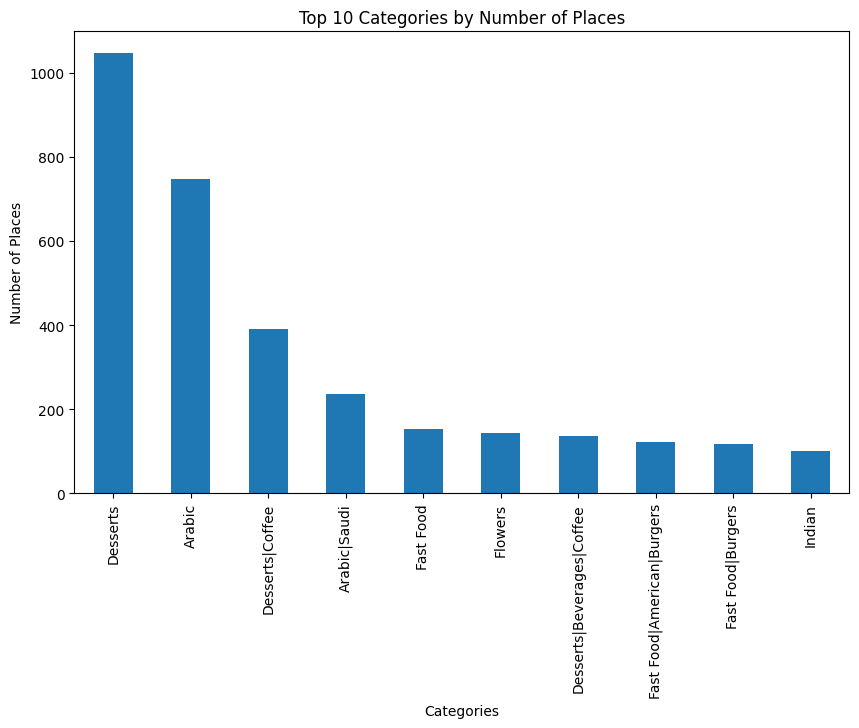

In [18]:
# Count the number of places in each category
cat_counts = places_DS['categories'].value_counts()

# Plot the top 10 categories
plt.figure(figsize=(10, 6))
cat_counts.head(10).plot(kind='bar')
plt.title('Top 10 Categories by Number of Places')
plt.xlabel('Categories')
plt.ylabel('Number of Places')
plt.show()

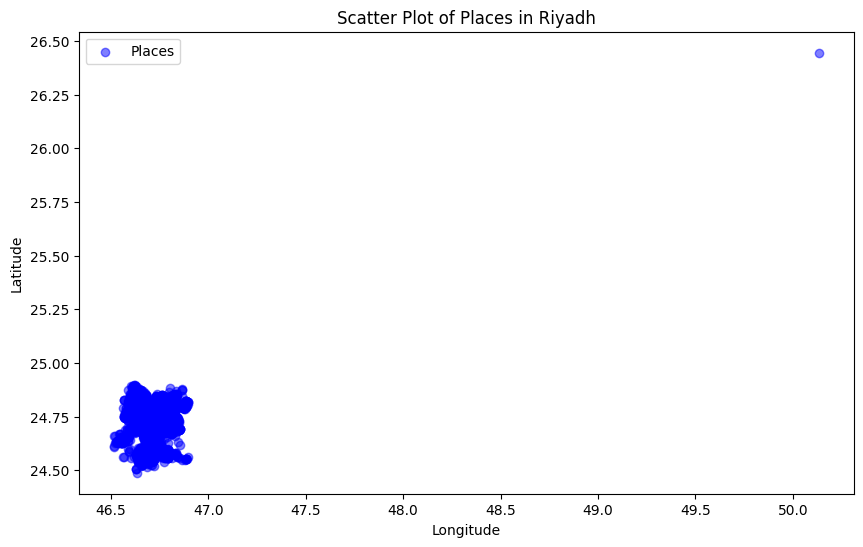

In [17]:
# Scatter plot of places based on latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(places_DS['longitude'], places_DS['latitude'], alpha=0.5, c='blue', label='Places')
plt.title('Scatter Plot of Places in Riyadh')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

**Step 6: Experimentation**

These are exercises for you to perform on your own.

1. Find Categories with the Highest Ratings:
Use groupby to find the average rating for each category.
Sort them to identify the best-rated categories.

2. Explore Rating Distribution:
Use a histogram to plot the distribution of average_rating.

3. Identify Popular Places:
Filter places with rate_count greater than 100 and sort them by average_rating.